In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import datetime as date
%matplotlib inline
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

In [2]:
loan_data = pd.read_csv('LoansData.csv')

In [3]:
loan_data.columns=loan_data.columns.str.replace('.','_')

In [4]:
loan_data.Interest_Rate=loan_data.Interest_Rate.str.replace('%','')

In [5]:
loan_data.Interest_Rate=loan_data.Interest_Rate.astype('float64')

In [6]:
loan_data.dropna(subset=['Interest_Rate','Amount_Funded_By_Investors'],inplace=True)

In [7]:
loan_data.isnull().sum()

Amount_Requested                   0
Amount_Funded_By_Investors         0
Interest_Rate                      0
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [8]:
#a. Interest rate is varied for different loan amounts(Less interest charged for high loan amounts)

In [9]:
#H0  - Interest rate inversly proportional to loan amt
#Ha  - Interest directly proportional to loan amt

#CI  - 95%,  p-0.05
#  perporm the test
stats.pearsonr(loan_data.Amount_Funded_By_Investors,loan_data.Interest_Rate)
# based on p values,p valueof the test is very small as compared to cutoff p at 95%;
# thus we will reject the H0

# business conclusion
# there is strong correlation between interest rate and loan amount
# claim is made at the CI of 95%

PearsonRResult(statistic=0.33745400436759665, pvalue=1.4916862719480412e-67)

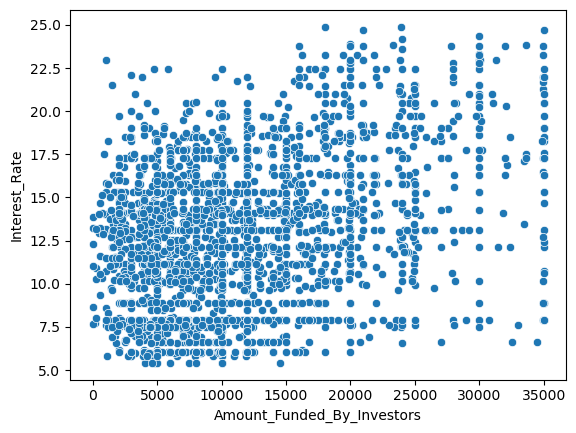

In [10]:
sns.scatterplot(loan_data.Amount_Funded_By_Investors,loan_data.Interest_Rate)
plt.show()

In [11]:
#b loan length is directly effecting interest rate

In [16]:
loan_data.Loan_Length=loan_data.Loan_Length.replace('months','').astype('float64')

ValueError: could not convert string to float: '36 months'

In [17]:
# H0 -Loan Length directly effecting Interest Rate
# Ha -Loan Length has no effecting on Interest Rate

# CI  -95%  ,p  - 0.05

#perform the test 
stats.pearsonr(loan_data.Loan_Length,loan_data.Interest_Rate)

# based on p values ,p value of the test is very small compared to cutoff p at 95%
# thus we will reject the H0

# business conclusion 
# Therefore loan length has no effect on Interest Rate
#clime is made at the CI of 95%


TypeError: unsupported operand type(s) for +: 'float' and 'str'

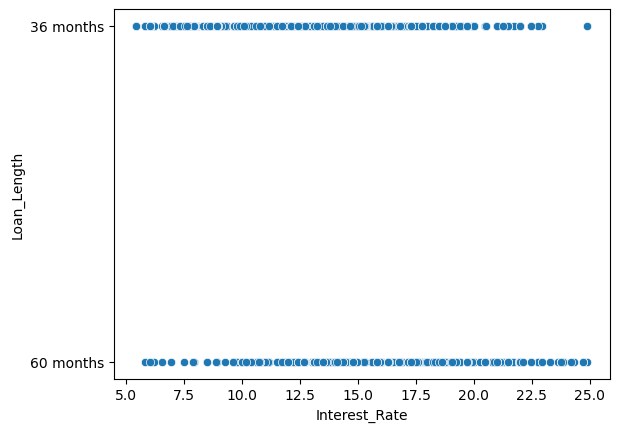

In [18]:
sns.scatterplot(loan_data.Interest_Rate,loan_data.Loan_Length)
plt.show()

In [19]:
# Interest rates varies for different purpose of loans

In [20]:
encode ={'Loan_Purpose':{'debt_consolidation':1,'credit card ':2,'others' :3,
                      'home_improvement' :4,'major_purchage' :5,'small_business':6,'car':7,'wedding':8,'medical':9,'moving':10,'vacation' :11,'house' :12}}

In [21]:
Loan_df = loan_data.loc[:,['Loan_Purpose','Interest_Rate']]
Loan_df = Loan_df.replace(encode)
Loan_df

,Loan_Purpose,Interest_Rate
0,1,8.90
1,1,12.12
2,1,21.98
3,1,9.99
4,credit_card,11.71
...,...,...
2495,1,16.77
2496,4,14.09
2497,1,13.99
2498,major_purchase,12.42


In [22]:
#filter the data for loan purpose
l1=Loan_df.loc[Loan_df.Loan_Purpose ==1,'Interest_Rate']
l2=Loan_df.loc[Loan_df.Loan_Purpose ==2,'Interest_Rate']
l3=Loan_df.loc[Loan_df.Loan_Purpose ==3,'Interest_Rate']
l4=Loan_df.loc[Loan_df.Loan_Purpose ==4,'Interest_Rate']
l5=Loan_df.loc[Loan_df.Loan_Purpose ==5,'Interest_Rate']
l6=Loan_df.loc[Loan_df.Loan_Purpose ==6,'Interest_Rate']
l7=Loan_df.loc[Loan_df.Loan_Purpose ==7,'Interest_Rate']
l8=Loan_df.loc[Loan_df.Loan_Purpose ==8,'Interest_Rate']
l9=Loan_df.loc[Loan_df.Loan_Purpose ==9,'Interest_Rate']
l10=Loan_df.loc[Loan_df.Loan_Purpose ==10,'Interest_Rate']
l11=Loan_df.loc[Loan_df.Loan_Purpose ==11,'Interest_Rate']
l12=Loan_df.loc[Loan_df.Loan_Purpose ==12,'Interest_Rate']
l13=Loan_df.loc[Loan_df.Loan_Purpose ==13,'Interest_Rate']
l14=Loan_df.loc[Loan_df.Loan_Purpose ==14,'Interest_Rate']

#H0 : Interet rate dosent varies for different purpose of loans
#H0 : Interest rate varies for different purpose of loans

#CI  = 95% ,p  = 0.05
# perform the test
stats.f_oneway(l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14)

# based on p values , p value of the test is small compard to cutoff p at 95%;
#thus we will reject the H0

#business conclusion
#therfore there is variation in interest rate for different purpose of loan ,claim is made at CI of 95%


F_onewayResult(statistic=nan, pvalue=nan)

In [23]:
#d There is relationship between FICO scores and Home Ownership.it means that,with Owning home  will have high FICO scores

In [24]:
ddf=loan_data.loc[loan_data.Home_Ownership =='OWN',['Home_Ownership','FICO_Range']]
cross=ddf.groupby(['FICO_Range'])['Home_Ownership'].count().reset_index()
cross

,FICO_Range,Home_Ownership
0,640-644,1
1,660-664,17
2,665-669,18
3,670-674,13
4,675-679,11
5,680-684,9
6,685-689,10
7,690-694,10
8,695-699,10
9,700-704,12


In [25]:
cross.loc[0:9,['FICO_Range']]=[1]
cross.loc[9:21,['FICO_Range']]=[2]
cross.loc[21:33,['FICO_Range']]=[3]
cross

,FICO_Range,Home_Ownership
0,1,1
1,1,17
2,1,18
3,1,13
4,1,11
5,1,9
6,1,10
7,1,10
8,1,10
9,2,12


In [26]:
# H0 : there is relationship between FICO score and home ownership 
# Ha : there is no relationship between FICO score and home ownership 

#CI =95% ,P = 0.05
# perform the test
stats.f_oneway(cross.FICO_Range,cross.Home_Ownership)

# based on p values , p value of the test is small compared to cutoff p at 95%
# thus we will reject the H0

# business conclusion
# therefore there is no significant relationship between FICO score and home ownership,claim is made at the CI of 95%

F_onewayResult(statistic=21.37277185335098, pvalue=1.8859075785241008e-05)

In [27]:
price_quote = pd.read_csv('Price_Quotes.csv')

In [28]:
price_quote

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [29]:
# business problem : we would like to asscess if there is any different in the average price quotes provide  by mary and barry

In [30]:
Barry =price_quote.Barry_Price.mean()
Mary=price_quote.Mary_Price.mean()
print('The average of Barry price Quote is :',Barry,'\n The average of Mary price Quote is :',Mary)

The average of Barry price Quote is : 124.33333333333333 
 The average of Mary price Quote is : 114.75


In [31]:
# H0 : U1 = U2
# Ha : U2 <>U2

#CI = 95% ,p =0.05
# perform the test

stats.ttest_rel(price_quote.Barry_Price,price_quote.Mary_Price)

# based on p values ,p value of the test is small compared to cutoff p at 95%
# thus we will reject the H0

#business conclusion
# Therefore there is significant difference in the average price quotes provided by Mary and Barry claim at the CI of 95%


Ttest_relResult(statistic=2.5213765108923494, pvalue=0.02840588045242053)

In [32]:
tratment=pd.read_csv('Treatment_Facility.csv')

In [33]:
tratment.rename(columns={'VAR4':'TRFF','VAR5':'CI'},inplace = True)

In [34]:
tratment

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [35]:
#business problem : Determine what effect ,if any ,the reengineering effort had on the incidence behaviour problems and staff turnover problems
# changed the critical incidence rate . Isthere evidence that the critical incidence rate improved

In [36]:
prior = tratment.loc[tratment.Reengineer=='Prior',['CI']]
post = tratment.loc[tratment.Reengineer=='Post',['CI']]
print('the average of CI before reengineering effort:' ,prior.mean(),'\n |the average of CI after reengineering effort :', post.mean())

the average of CI before reengineering effort: CI    53.887906
dtype: float64 
 |the average of CI after reengineering effort : CI    23.349719
dtype: float64


In [38]:
# H0 : critical incident rate has not improved
# Ha : critical incident rate has improved

# CI = 95% ,p =0.05
# perform the test

stats.ttest_ind(prior,post)

# based on P values,p value of the test is high compared to cutoff p at 95%
# therefore the critical incident rate has not improved after the reengineering effort,claim is made at CI of 95%

Ttest_indResult(statistic=array([1.62791443]), pvalue=array([0.12091989]))

In [45]:
# Q4
priority = pd.read_csv('Priority_Assessment.csv')

In [47]:
high = priority.loc[priority.Priority=='High',['Days']]
medium=priority.loc[priority.Priority=='Medium',['Days']]
low=priority.loc[priority.Priority=='Low',['Days']]
print('The average days to complete High priority jobs :',high.mean(),'\n The average days to complete meadium priority jobs :',medium.mean(),'\n The average days to complete low priority jobs :',low.mean())

The average days to complete High priority jobs : Days    3.02362
dtype: float64 
 The average days to complete meadium priority jobs : Days    2.5
dtype: float64 
 The average days to complete low priority jobs : Days    4.228358
dtype: float64


In [49]:
#H0 : high<>medium<>low
#Ha : High<>medium<>low

# CI = 95% ,p=0.05
# perform the test
stats.f_oneway(high,medium,low)

# based on p values,p value of the test is high compared to cutoff p at 95%
#thus we will fail to reject the H0

# business conclusion
# therefore the job are not completed on the prioritizing order (high>medium>low),claim is made at CI of 95%

F_onewayResult(statistic=array([1.81231101]), pvalue=array([0.16411459]))

In [50]:
films=pd.read_csv('Films.csv')

In [51]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [78]:
films.loc[films.Marital_Status=='Single',['Marital_Status']]=['Single']
films.loc[films.Marital_Status=='1',['Marital_Status']]=['Married']
films.loc[films.Marital_Status=='2',['Marital_Status']]=['Single']

In [53]:
films.loc[films.Gender=='1',['Gender']]=['Male']
films.loc[films.Gender=='2',['Gender']]=['Female']


In [54]:
# what is the overall satisfaction

Text(0.5, 1.0, 'The overall level of customer satisfaction')

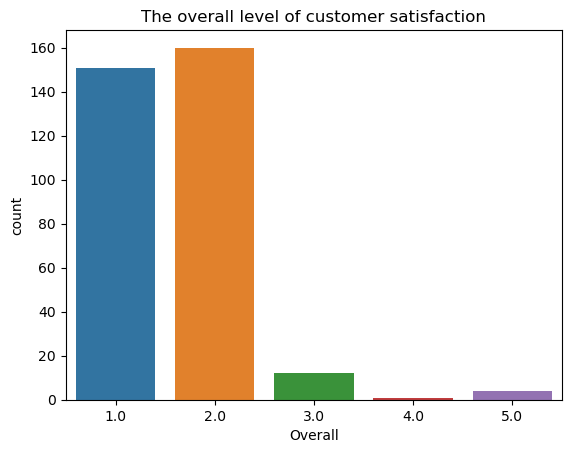

In [55]:
# Distribution of overall Satisfaction
sns.countplot(x= 'Overall',data=films)
plt.title('The overall level of customer satisfaction' )

In [56]:
#what factors are linked to satisfaction

In [57]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [59]:
sin_over=pd.crosstab(films.Sinage,films.Overall)
#H0 : No relationship
#Ha : Relationship Exist
# CI =95% ,p =0.05
# perform the test
stats.chi2_contingency(observed=sin_over)
# based on p values ,p value of the test is small compared to cutoff p at 95%
# thus we will reject the H0

# Businee problem
# therefore the factor Sinage linked to overall satisfaction,claim is made at CI of 95%

(124.81695331531306,
 6.47639805161236e-19,
 16,
 array([[5.18348624e+01, 5.52905199e+01, 4.14678899e+00, 3.45565749e-01,
         1.38226300e+00],
        [7.11009174e+01, 7.58409786e+01, 5.68807339e+00, 4.74006116e-01,
         1.89602446e+00],
        [2.20183486e+01, 2.34862385e+01, 1.76146789e+00, 1.46788991e-01,
         5.87155963e-01],
        [2.75229358e+00, 2.93577982e+00, 2.20183486e-01, 1.83486239e-02,
         7.33944954e-02],
        [2.29357798e+00, 2.44648318e+00, 1.83486239e-01, 1.52905199e-02,
         6.11620795e-02]]))

In [61]:
park_over =pd.crosstab(films.Parking,films.Overall)
#H0 : No Relationship
#Ha : Relationship exist
# CI = 95% ,P = 0.05
# perform the test
stats.chi2_contingency(observed=park_over)
# based on p values, p value of the test is small compared to cutoff p at 95%
# thus we will reject the H0

# Business conclusion
# Therefore the factor Parking linked to overall satisfaction ,claim is made at CI of 95%

(229.4794365763204,
 8.162450437898108e-40,
 16,
 array([[6.18776758e+01, 6.51559633e+01, 4.91743119e+00, 4.09785933e-01,
         1.63914373e+00],
        [7.06513761e+01, 7.43944954e+01, 5.61467890e+00, 4.67889908e-01,
         1.87155963e+00],
        [1.33914373e+01, 1.41009174e+01, 1.06422018e+00, 8.86850153e-02,
         3.54740061e-01],
        [3.23241590e+00, 3.40366972e+00, 2.56880734e-01, 2.14067278e-02,
         8.56269113e-02],
        [1.84709480e+00, 1.94495413e+00, 1.46788991e-01, 1.22324159e-02,
         4.89296636e-02]]))

In [62]:
clean_over=pd.crosstab(films.Clean,films.Overall)
#H0 : No Relationship
#Ha : Relationship Exist

#CI = 95%,p = 0.05
#perform the test
stats.chi2_contingency(observed=clean_over)
# based on p values ,p value of the test is small compared to cutoff p at 95%
#thus we will reject the H0

#business problem
#Therefore the factor Clean linked to overall satisfaction,claim is made at CI of 95%

(125.17708834561675,
 5.517448379868074e-19,
 16,
 array([[6.64954128e+01, 7.00183486e+01, 5.28440367e+00, 4.40366972e-01,
         1.76146789e+00],
        [7.01896024e+01, 7.39082569e+01, 5.57798165e+00, 4.64831804e-01,
         1.85932722e+00],
        [1.10825688e+01, 1.16697248e+01, 8.80733945e-01, 7.33944954e-02,
         2.93577982e-01],
        [2.30886850e+00, 2.43119266e+00, 1.83486239e-01, 1.52905199e-02,
         6.11620795e-02],
        [9.23547401e-01, 9.72477064e-01, 7.33944954e-02, 6.11620795e-03,
         2.44648318e-02]]))

In [63]:
# what is the demographic profile of File on the Rocks patrons

In [64]:
films.loc[films.Age==1,['Age']]=['1-12']
films.loc[films.Age==2,['Age']]=['13-30']
films.loc[films.Age==3,['Age']]=['31-60']
films.loc[films.Age==4,['Age']]=['60+']

In [65]:
films.loc[films.Marital_Status==1,['Marital_Status']] =['Married']
films.loc[films.Marital_Status==2,['Marital_Status']] =['Single']

In [72]:
films.loc[films.Income==1,['Income']]=['<$50,000']
films.loc[films.Income==2,['Income']]=['<$50-$100,000']
films.loc[films.Income==3,['Income']]=['=$50,000+']

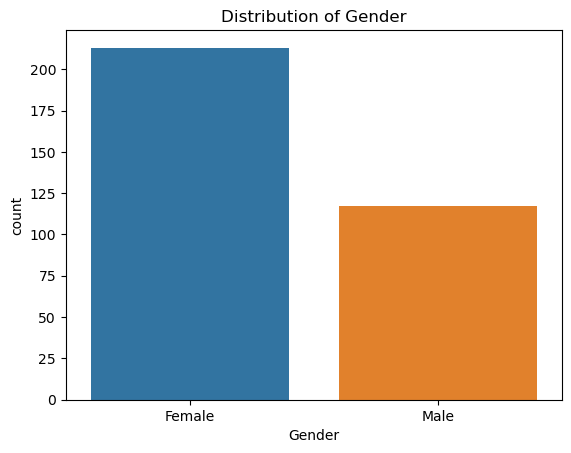

In [73]:
# see the distribution of gender to recognize different distributions
sns.countplot(x='Gender',data=films);
plt.title('Distribution of Gender');

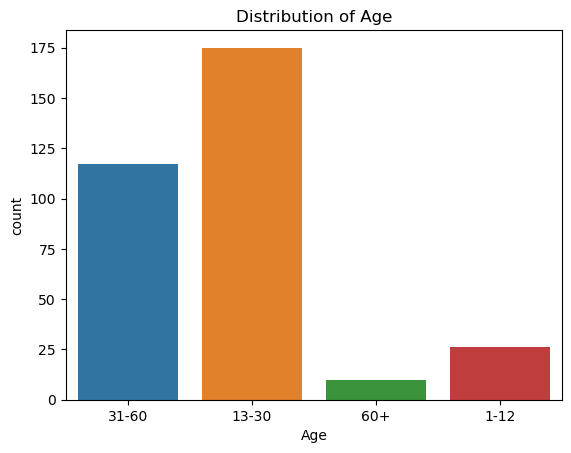

In [74]:
# countplot for age distibution
sns.countplot(x='Age',data=films)
plt.title('Distribution of Age');

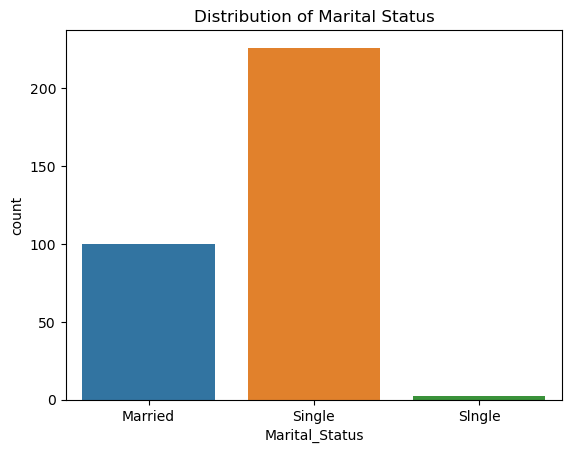

In [79]:
# distribution of Marital status
sns.countplot(x='Marital_Status',data=films);
plt.title('Distribution of Marital Status');

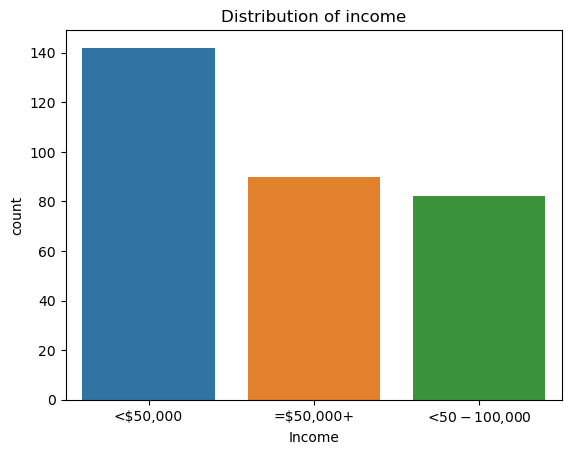

In [76]:
# Distribution of Income
sns.countplot(x='Income',data= films);
plt.title('Distribution of income');

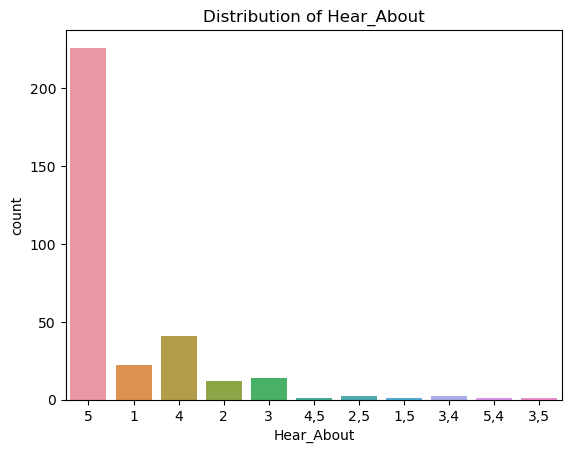

In [80]:
#distributio of Hear_About:
sns.countplot(x='Hear_About',data=films);
plt.title('Distribution of Hear_About');